<a href="https://colab.research.google.com/github/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_114_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# ASSIGNMENT

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.



---


*Lecture notes below*


---






# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [57]:
!wget -O LoanStats_2018Q4.csv.zip "https://github.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LoanStats_2018Q4.csv.zip?raw=true"

--2019-09-05 16:53:37--  https://github.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LoanStats_2018Q4.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module4-makefeatures/LoanStats_2018Q4.csv.zip [following]
--2019-09-05 16:53:37--  https://github.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module4-makefeatures/LoanStats_2018Q4.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-makefeatures/LoanStats_2018Q4.csv.zip [following]
--2019-09-05 16:53:37--  https://raw.githubusercontent.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-makefeatures/Lo

In [58]:
!unzip -o LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [59]:
!head LoanStats_2018Q4.csv
!tail LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [60]:
import pandas
df_loans = pandas.read_csv(
    'LoanStats_2018Q4.csv', 
    skiprows=1, 
    skipfooter=2, 
    quotechar='"', 
    skipinitialspace=True
  )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


In [61]:

print(df_loans.isna().sum())
df_loans.describe()
#df_loans.head(15)


id                                            128412
member_id                                     128412
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      20947
emp_length                                     11704
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,...,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,0.0,0.0,128175.000000,128412.000000,128412.000000,56216.000000,15450.000000,128412.000000,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,29180.000000,128412.0,1.678200e+04,16782.000000,128412.0,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,...,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,125553.0,128412.0,128412.000000,128412.000000,128412.000000,126720.000000,128412.000000,128412.0,1.284120e+05,1.284120e+05,128412.000000,1.284120e+05,1.678200e+04,16782.000000,16782.000000,16782.000000,16524.000000,16782.000000,16782.000000,16782.000000,16782.000000,5154.000000,27.0,27.000000,27.0,27.000000,26.000000,27.000000,27.000000,111.000000,111.000000,111.000000
mean,NaN,NaN,15971.321021,15971.321021,15968.498166,463.254376,8.279733e+04,NaN,NaN,19.933178,0.227837,0.447038,36.880337,86.130162,11.564052,0.121850,1.689800e+04,22.677413,11628.759791,11626.930092,5393.350553,5392.183328,4069.270396,1318.012513,0.519020,5.548623,0.998752,1705.795743,0.017958,46.553461,1.0,1.335516e+05,19.226602,0.0,188.304286,1.467922e+05,0.939507,2.760202,0.689071,1.572665,...,5.414128,4.882129,7.065944,8.288524,8.199210,12.866702,5.386342,11.546717,0.0,0.0,0.059488,2.011642,94.659843,32.900756,0.121733,0.0,1.884852e+05,5.356097e+04,27439.534163,4.682180e+04,3.664280e+04,0.585985,1.587177,11.436003,55.878831,3.027112,12.423907,0.036170,0.062984,38.515910,3.0,211.769630,3.0,13.851852,654.789231,14635.793704,316.892593,7330.395946,53.095495,18.045045
std,NaN,NaN,10150.384233,10150.384233,10152.168970,285.718332,1.082985e+05,NaN,NaN,20.143542,0.733793,0.734480,21.813805,21.880055,5.981599,0.332825,2.408255e+04,12.129216,9282.436085,9283.150521,5494.550279,5494.614849,5251.332554,1079.024880,5.568991,165.257042,29.746268,4749.147467,0.146569,21.801716,0.0,9.687001e+04,8.141631,0.0,1569.290033,1.738727e+05,1.145306,2.942377,0.935776,1.565118,...,3.439644,3.205305,4.517165,7.389195,4.958905,7.873911,3.388380,5.977599,0.0,0.0,0.410652,1.880559,8.989288,34.899647,0.332552,0.0,1.965536e+05,5.599335e+04,26377.282557,4.957491e+04,3.252566e+04,0.936053,1.801878,6.690119,26.071241,3.254318,8.190067,0.347726,0.364083,23.659436,0.0,125.786417,0.0,7.583909,370.729150,7527.834921,231.449666,4682.992392,10.260846,6.577354
min,NaN,NaN,1000.000000,1000.000000,725.000000,30.480000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000

id                                            128412
member_id                                     128412
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      20947
emp_length                                     11704
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,...,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,0.0,0.0,128175.000000,128412.000000,128412.000000,56216.000000,15450.000000,128412.000000,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,29180.000000,128412.0,1.678200e+04,16782.000000,128412.0,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,...,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,125553.0,128412.0,128412.000000,128412.000000,128412.000000,126720.000000,128412.000000,128412.0,1.284120e+05,1.284120e+05,128412.000000,1.284120e+05,1.678200e+04,16782.000000,16782.000000,16782.000000,16524.000000,16782.000000,16782.000000,16782.000000,16782.000000,5154.000000,27.0,27.000000,27.0,27.000000,26.000000,27.000000,27.000000,111.000000,111.000000,111.000000
mean,NaN,NaN,15971.321021,15971.321021,15968.498166,463.254376,8.279733e+04,NaN,NaN,19.933178,0.227837,0.447038,36.880337,86.130162,11.564052,0.121850,1.689800e+04,22.677413,11628.759791,11626.930092,5393.350553,5392.183328,4069.270396,1318.012513,0.519020,5.548623,0.998752,1705.795743,0.017958,46.553461,1.0,1.335516e+05,19.226602,0.0,188.304286,1.467922e+05,0.939507,2.760202,0.689071,1.572665,...,5.414128,4.882129,7.065944,8.288524,8.199210,12.866702,5.386342,11.546717,0.0,0.0,0.059488,2.011642,94.659843,32.900756,0.121733,0.0,1.884852e+05,5.356097e+04,27439.534163,4.682180e+04,3.664280e+04,0.585985,1.587177,11.436003,55.878831,3.027112,12.423907,0.036170,0.062984,38.515910,3.0,211.769630,3.0,13.851852,654.789231,14635.793704,316.892593,7330.395946,53.095495,18.045045
std,NaN,NaN,10150.384233,10150.384233,10152.168970,285.718332,1.082985e+05,NaN,NaN,20.143542,0.733793,0.734480,21.813805,21.880055,5.981599,0.332825,2.408255e+04,12.129216,9282.436085,9283.150521,5494.550279,5494.614849,5251.332554,1079.024880,5.568991,165.257042,29.746268,4749.147467,0.146569,21.801716,0.0,9.687001e+04,8.141631,0.0,1569.290033,1.738727e+05,1.145306,2.942377,0.935776,1.565118,...,3.439644,3.205305,4.517165,7.389195,4.958905,7.873911,3.388380,5.977599,0.0,0.0,0.410652,1.880559,8.989288,34.899647,0.332552,0.0,1.965536e+05,5.599335e+04,26377.282557,4.957491e+04,3.252566e+04,0.936053,1.801878,6.690119,26.071241,3.254318,8.190067,0.347726,0.364083,23.659436,0.0,125.786417,0.0,7.583909,370.729150,7527.834921,231.449666,4682.992392,10.260846,6.577354
min,NaN,NaN,1000.000000,1000.000000,725.000000,30.480000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000

In [62]:

# Keep rows with >= 10 values, and columns with >= 1000
df_cleaned = df_loans.dropna(axis='columns', thresh=1000).dropna(axis='rows', thresh=10)
# Our remaining NaNs
df_cleaned.isna().sum()[df_cleaned.isna().sum()>0]


emp_title                               20947
emp_length                              11704
dti                                       237
mths_since_last_delinq                  72196
mths_since_last_record                 112962
revol_util                                156
last_pymnt_d                              159
next_pymnt_d                            16123
last_credit_pull_d                          1
mths_since_last_major_derog             99232
annual_inc_joint                       111630
dti_joint                              111630
verification_status_joint              113564
mths_since_rcnt_il                       4478
il_util                                 20274
all_util                                   37
avg_cur_bal                                13
bc_open_to_buy                           1691
bc_util                                  1754
mo_sin_old_il_acct                       4478
mths_since_recent_bc                     1591
mths_since_recent_bc_dlq          

emp_title                               20947
emp_length                              11704
dti                                       237
mths_since_last_delinq                  72196
mths_since_last_record                 112962
revol_util                                156
last_pymnt_d                              159
next_pymnt_d                            16123
last_credit_pull_d                          1
mths_since_last_major_derog             99232
annual_inc_joint                       111630
dti_joint                              111630
verification_status_joint              113564
mths_since_rcnt_il                       4478
il_util                                 20274
all_util                                   37
avg_cur_bal                                13
bc_open_to_buy                           1691
bc_util                                  1754
mo_sin_old_il_acct                       4478
mths_since_recent_bc                     1591
mths_since_recent_bc_dlq          

In [0]:

def toNumeric(percent_string: str):
  """
  Converts a string in the format '1.23%' to a numeric data type
  
  Arguments:
    percent_string (str): Input string
    
  Returns:
    numeric: Numeric ratio
  """
  return(pandas.to_numeric(str.strip(percent_string, '%'))/100)

df_cleaned['int_rate_num'] = df_cleaned['int_rate'].apply(toNumeric)
# .map would also work here


In [72]:
df_cleaned.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_num
count,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,128175.000000,128412.000000,128412.000000,56216.000000,15450.000000,128412.000000,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,29180.000000,128412.0,1.678200e+04,16782.000000,128412.0,128412.000000,1.284120e+05,128412.000000,128412.000000,128412.000000,128412.000000,123934.000000,1.284120e+05,108138.000000,128412.000000,...,128412.000000,128412.000000,128412.000000,126821.000000,25169.000000,112365.000000,36782.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,128412.000000,125553.0,128412.0,128412.000000,128412.000000,128412.000000,126720.000000,128412.000000,128412.0,1.284120e+05,1.284120e+05,128412.000000,1.284120e+05,1.678200e+04,16782.000000,16782.000000,16782.000000,16524.000000,16782.000000,16782.000000,16782.000000,16782.000000,5154.000000,128412.000000
mean,15971.321021,15971.321021,15968.498166,463.254376,8.279733e+04,19.933178,0.227837,0.447038,36.880337,86.130162,11.564052,0.121850,1.689800e+04,22.677413,11628.759791,11626.930092,5393.350553,5392.183328,4069.270396,1318.012513,0.519020,5.548623,0.998752,1705.795743,0.017958,46.553461,1.0,1.335516e+05,19.226602,0.0,188.304286,1.467922e+05,0.939507,2.760202,0.689071,1.572665,20.201519,3.627228e+04,68.211757,1.195901,...,15.431634,8.635400,1.323155,26.013957,40.415233,7.552832,37.817275,0.461553,3.659876,5.414128,4.882129,7.065944,8.288524,8.199210,12.866702,5.386342,11.546717,0.0,0.0,0.059488,2.011642,94.659843,32.900756,0.121733,0.0,1.884852e+05,5.356097e+04,27439.534163,4.682180e+04,3.664280e+04,0.585985,1.587177,11.436003,55.878831,3.027112,12.423907,0.036170,0.062984,38.515910,0.129298
std,10150.384233,10150.384233,10152.168970,285.718332,1.082985e+05,20.143542,0.733793,0.734480,21.813805,21.880055,5.981599,0.332825,2.408255e+04,12.129216,9282.436085,9283.150521,5494.550279,5494.614849,5251.332554,1079.024880,5.568991,165.257042,29.746268,4749.147467,0.146569,21.801716,0.0,9.687001e+04,8.141631,0.0,1569.290033,1.738727e+05,1.145306,2.942377,0.935776,1.565118,24.869930,4.726387e+04,23.589461,1.470123,...,19.053976,9.573207,1.713149,34.306721,22.305270,6.057088,22.023835,1.349412,2.448079,3.439644,3.205305,4.517165,7.389195,4.958905,7.873911,3.388380,5.977599,0.0,0.0,0.410652,1.880559,8.989288,34.899647,0.332552,0.0,1.965536e+05,5.599335e+04,26377.282557,4.957491e+04,3.252566e+04,0.936053,1.801878,6.690119,26.071241,3.254318,8.190067,0.347726,0.364083,23.659436,0.050907
min,100

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

Apply the function to the `int_rate` column

### Clean `emp_title`

Look at top 20 titles

In [89]:
for i in df_cleaned['emp_title'].value_counts(dropna=False).head(20).index.unique():
  if 'Super' in str(i):
    print(f'"{i}"')

"Supervisor"
"Supervisor "


How often is `emp_title` null?

Clean the title and handle missing values

In [136]:



def cleanTitle(title):
  
  title = str(title).strip().lower()
  if title == 'nan': title = 'n/a'
    
    
  def isManager(title):
    if 'manager' in title: return(True)
    return(False)
  def isNurse(title):
    if 'nurse' in title: return(True)
    if title == 'rn': return(True)
    return(False)
  def isSecretary(title):
    return(title in ['administrative assistant', 'executive assistant'])
  titleMappings = {
      'manager': isManager,
      'nurse': isNurse,
      'secretary': isSecretary
  }
  
  for mapping in titleMappings:
    if titleMappings[mapping](title):
      title = mapping
      break
    
  return(title)

df_cleaned['emp_title_cleaned'] = df_cleaned['emp_title'].apply(cleanTitle)

df_cleaned['emp_title_cleaned'].value_counts(dropna=False).head(40)


n/a                  20949
manager              17885
nurse                 3514
teacher               2557
driver                1258
supervisor            1160
truck driver           920
secretary              851
sales                  803
owner                  625
director               523
police officer         440
technician             420
engineer               412
mechanic               391
server                 357
vice president         352
accountant             335
electrician            302
foreman                302
president              293
machine operator       284
customer service       283
operator               267
attorney               264
maintenance            254
paralegal              249
superintendent         248
bartender              237
software engineer      221
cashier                215
analyst                214
medical assistant      212
machinist              209
cook                   200
cna                    196
sales associate        191
c

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [164]:
df_cleaned['emp_title_manager'] = df_cleaned['emp_title_cleaned'] == 'manager'

df_cleaned[df_cleaned['emp_title_manager'] == True].describe()


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,...,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_num,payment_interval,term_months
count,17885.000000,17885.000000,17885.000000,17885.000000,1.788500e+04,17884.000000,17885.000000,17885.000000,8061.000000,2034.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.00000,17885.000000,17885.000000,17885.000000,4166.000000,17885.0,1917.000000,1917.000000,17885.0,17885.000000,1.788500e+04,17885.000000,17885.000000,17885.000000,17885.000000,17485.000000,1.788500e+04,15671.000000,17885.000000,...,17885.000000,17743.000000,3637.000000,15937.000000,5246.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17452.0,17885.0,17885.000000,17885.000000,17885.000000,17733.000000,17885.000000,17885.0,1.788500e+04,1.788500e+04,17885.000000,1.788500e+04,1917.000000,1917.000000,1917.000000,1917.000000,1892.000000,1917.000000,1917.000000,1917.000000,1917.000000,554.000000,17885.000000,15556,17885.000000
mean,17357.948001,17357.948001,17355.083799,497.616563,9.289494e+04,19.090393,0.233324,0.450210,37.107059,86.990167,12.220688,0.115068,18990.511826,23.744367,12634.598632,12632.769415,5866.605167,5865.382925,4440.171445,1420.743117,0.505264,5.18534,0.933361,1914.881173,0.020632,47.209073,1.0,144508.729457,19.384794,0.0,199.683366,1.665774e+05,0.979983,2.960134,0.743193,1.716522,18.172262,3.922299e+04,67.963372,1.199776,...,1.467990,25.309981,41.038218,7.482148,38.135532,0.487112,3.922393,5.714453,5.230696,7.452726,8.776125,8.587196,13.275259,5.683030,12.204864,0.0,0.0,0.058261,2.089852,94.589992,33.824841,0.115068,0.0,2.118400e+05,5.861848e+04,30611.099301,5.132094e+04,39984.530516,0.539384,1.660929,11.719353,55.467812,3.116849,12.439228,0.032342,0.060511,40.272563,0.127605,34 days 02:32:49.863718,44.271512
std,10360.084113,10360.084113,10361.899954,289.716290,9.451115e+04,11.239136,0.769706,0.737033,21.865568,21.288913,5.989777,0.323637,22045.995269,12.158627,9658.670690,9659.301800,5809.578226,5809.674826,5600.184899,1115.204946,6.082422,139.32110,25.077798,5155.199708,0.153864,21.730373,0.0,62744.696929,7.681462,0.0,1336.880016,1.703734e+05,1.160918,2.892974,0.960861,1.606239,21.627997,4.518219e+04,22.737358,1.489041,...,1.749955,32.790950,22.646466,5.973246,22.225564,1.404817,2.512085,3.565431,3.256329,4.585499,7.283825,5.017144,7.872417,3.504368,5.987748,0.0,0.0,0.439679,1.914620,8.947790,34.754609,0.323637,0.0,1.895224e+05,5.234451e+04,27029.174974,4.804817e+04,31722.863925,0.863393,1.755041,6.403899,26.240738,3.037159,7.947314,0.297865,0.333405,23.876939,0.050709,13 days 16:01:18.730482,11.406387
min,1000.000000,1000.000000,750.000000,30.640000,0.000000e+00,0.000

In [113]:

df_cleaned[df_cleaned['emp_title_manager'] != True].describe()


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_num
count,110527.000000,110527.000000,110527.000000,110527.000000,1.105270e+05,110291.000000,110527.000000,110527.000000,48155.000000,13416.000000,110527.000000,110527.000000,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,25014.000000,110527.0,1.486500e+04,14865.000000,110527.0,110527.000000,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,106449.000000,1.105270e+05,92467.000000,110527.000000,...,110527.000000,110527.000000,110527.000000,109078.000000,21532.000000,96428.000000,31536.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,108101.0,110527.0,110527.000000,110527.000000,110527.000000,108987.000000,110527.000000,110527.0,1.105270e+05,1.105270e+05,110527.000000,1.105270e+05,1.486500e+04,14865.000000,14865.000000,14865.000000,14632.000000,14865.000000,14865.000000,14865.000000,14865.000000,4600.000000,110527.000000
mean,15746.943055,15746.943055,15744.126890,457.694035,8.116338e+04,20.069837,0.226949,0.446524,36.842384,85.999776,11.457798,0.122947,1.655940e+04,22.504764,11465.999310,11464.169533,5316.770543,5315.612221,4009.252796,1301.389092,0.521246,5.607408,1.009333,1671.962445,0.017525,46.444271,1.0,1.321386e+05,19.206202,0.0,186.462973,1.435906e+05,0.932958,2.727849,0.680313,1.549386,20.534838,3.579481e+04,68.253853,1.195274,...,15.462891,8.716359,1.299719,26.128468,40.310004,7.564514,37.764333,0.457418,3.617397,5.365531,4.825726,7.003357,8.209623,8.136428,12.800592,5.338334,11.440218,0.0,0.0,0.059687,1.998987,94.671146,32.750401,0.122812,0.0,1.847061e+05,5.274259e+04,26926.325242,4.609377e+04,3.621184e+04,0.591995,1.577666,11.399462,55.931978,3.015540,12.421931,0.036663,0.063303,38.304348,0.129572
std,10098.208331,10098.208331,10099.992212,284.677835,1.102812e+05,21.235410,0.727815,0.734069,21.805126,21.966126,5.973520,0.334277,2.437934e+04,12.115676,9209.837287,9210.566767,5438.017265,5438.077266,5190.216099,1072.136006,5.481417,169.080805,30.434545,4679.278386,0.145350,21.812095,0.0,1.003447e+05,8.199119,0.0,1603.732537,1.742220e+05,1.142630,2.949032,0.931362,1.557121,25.347410,4.757516e+04,23.730703,1.467045,...,19.104109,9.730896,1.705972,34.545782,22.245932,6.070785,21.990006,1.340192,2.434916,3.416391,3.193412,4.502909,7.403119,4.946579,7.872195,3.366796,5.969165,0.0,0.0,0.405761,1.874691,8.995974,34.921035,0.333961,0.0,1.974092e+05,5.651937e+04,26234.383219,4.977957e+04,3.260387e+04,0.944876,1.807669,6.725482,26.049672,3.281195,8.221109,0.353650,0.367862,23.626911,0.050933
min,1000.

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [128]:
new = pandas.to_datetime('2000-04-01', infer_datetime_format=True)
print(new.min)

1677-09-21 00:12:43.145225


In [134]:
#df_cleaned[df_cleaned]
df_cleaned.select_dtypes(exclude='number').head()


,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,debt_settlement_flag,emp_title_cleaned,emp_title_manager
0,36 months,10.33%,B,B1,NaN,< 1 year,MORTGAGE,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,Jan-1996,38%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,n/a,False
1,36 months,23.40%,E,E1,Security,3 years,RENT,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,Sep-2006,19.2%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,security,False
2,36 months,17.97%,D,D1,Administrative,6 years,MORTGAGE,Source Verified,Dec-2018,Late (31-120 days),n,debt_consolidation,Debt consolidation,490xx,MI,Apr-2011,19.1%,w,Jun-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,administrative,False
3,60 months,20.89%,D,D4,Operator,5 years,RENT,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,672xx,KS,Feb-1997,13%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,operator,False
4,36 months,23.40%,E,E1,Manager,10+ years,OWN,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,Jan-1995,81.3%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,manager,True


In [159]:

df_cleaned['issue_datetime'] = pandas.to_datetime(df_cleaned['issue_d'], infer_datetime_format=True)
df_cleaned['earliest_cr_line_datetime'] = pandas.to_datetime(df_cleaned['earliest_cr_line'], infer_datetime_format=True)
df_cleaned['last_payment'] = pandas.to_datetime(df_cleaned['last_pymnt_d'], infer_datetime_format=True)
df_cleaned['next_payment'] = pandas.to_datetime(df_cleaned['next_pymnt_d'], infer_datetime_format=True)

df_cleaned['payment_interval'] = df_cleaned['next_payment'] - df_cleaned['last_payment']
df_cleaned['payment_interval'].describe()



count                     112289
mean     34 days 04:01:25.536428
std      13 days 18:08:45.451586
min              0 days 00:00:00
25%             31 days 00:00:00
50%             31 days 00:00:00
75%             31 days 00:00:00
max            153 days 00:00:00
Name: payment_interval, dtype: object

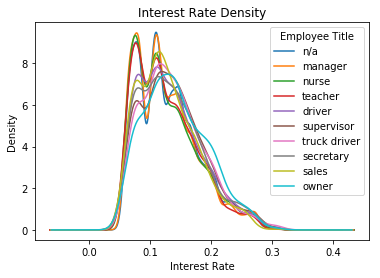

In [153]:

import matplotlib.pyplot as pyplot
import scipy.stats

titles = df_cleaned['emp_title_cleaned'].value_counts(dropna=False).head(10).index
for title in titles:
  #print(f'Title: {title}')
  subset = df_cleaned[df_cleaned['emp_title_cleaned']==title]
  subset['int_rate_num'].plot.density()
  
leg = pyplot.legend(titles)
leg.set_title('Employee Title')
pyplot.title('Interest Rate Density')
pyplot.xlabel('Interest Rate')
pyplot.show()





---


*Assignment continues from here*


---



In [161]:
df_cleaned['term'].head()

0     36 months
1     36 months
2     36 months
3     60 months
4     36 months
Name: term, dtype: object

In [162]:

def parseMonths(monthStr: str):
  # This could be a lambda
  # But I prefer to avoid anything but the simplest lambdas
  # As they can lead to unmaintainable code
  return(int(monthStr.strip().split(' ')[0]))

df_cleaned['term_months'] = df_cleaned['term'].apply(parseMonths)

df_cleaned['term_months'].head()


0    36
1    36
2    36
3    60
4    36
Name: term_months, dtype: int64

In [172]:
df_cleaned['loan_status_is_great'] = df_cleaned['loan_status']. \
                                            map({'Fully Paid': 1, 
                                                 'Current': 1}). \
                                            fillna(value=0). \
                                            astype('int64')
df_cleaned['loan_status_is_great'].head()

0    1
1    1
2    0
3    1
4    1
Name: loan_status_is_great, dtype: int64

In [176]:
df_cleaned['last_pymnt_d_month'] = df_cleaned['last_payment'].dt.month
df_cleaned['last_pymnt_d_year'] = df_cleaned['last_payment'].dt.year

df_cleaned[['last_pymnt_d_month', 'last_pymnt_d_year']].head()

,last_pymnt_d_month,last_pymnt_d_year
0,7.0,2019.0
1,7.0,2019.0
2,6.0,2019.0
3,7.0,2019.0
4,7.0,2019.0


# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!